<a href="https://colab.research.google.com/github/Faouzi-Slimi/python_Avancee/blob/main/TP_DOGS_CATS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# Import Library
import pandas as pd 
import numpy as np
from PIL import Image
import os
import cv2
import matplotlib.pyplot as plt

In [20]:
# Function to get Data 
def get_data_set (filepath) :
  imgs=[]
  labels=[]
  for f in os.listdir(filepath) :
    #if not (f.endswith('pgm')):   
      print('reding file :' +f)
      img=cv2.imread(filepath+f)/255
      resized = cv2.resize(img,(256,256))
      imgs.append(resized)
      if f.split('.')[0]=="dog":
        labels.append(0)
      else:
        labels.append(1)
  print('reding file finished')
  return np.asarray(imgs),labels

In [ ]:
# Connect colab To Drive
from google.colab import drive
drive.mount('/content/drive')

In [21]:
# Get Data
filepath=('/content/drive/MyDrive/Data/')
imgs1,labels=get_data_set(filepath)

reding file :cat.4013.jpg
reding file :cat.4012.jpg
reding file :cat.4001.jpg
reding file :cat.4028.jpg
reding file :cat.4024.jpg
reding file :cat.4023.jpg
reding file :cat.4016.jpg
reding file :cat.4034.jpg
reding file :cat.4006.jpg
reding file :cat.4025.jpg
reding file :cat.4004.jpg
reding file :cat.4015.jpg
reding file :cat.4002.jpg
reding file :cat.4005.jpg
reding file :cat.4027.jpg
reding file :cat.4026.jpg
reding file :cat.4003.jpg
reding file :cat.4017.jpg
reding file :cat.4014.jpg
reding file :dog.4037.jpg
reding file :cat.4036.jpg
reding file :cat.4046.jpg
reding file :dog.4004.jpg
reding file :cat.4035.jpg
reding file :dog.4039.jpg
reding file :dog.4003.jpg
reding file :cat.4047.jpg
reding file :dog.4036.jpg
reding file :dog.4048.jpg
reding file :cat.4045.jpg
reding file :dog.4026.jpg
reding file :dog.4016.jpg
reding file :dog.4046.jpg
reding file :dog.4005.jpg
reding file :dog.4002.jpg
reding file :dog.4006.jpg
reding file :dog.4001.jpg
reding file :cat.4039.jpg
reding file 

In [7]:
data_augmentation = Sequential([
  layers.RandomFlip("horizontal_and_vertical"),
  layers.RandomRotation(0.2),
])

In [8]:
images=[]
for i in imgs1 :
  # Add the image to a batch.
  imag = tf.expand_dims(i, 0)
  images.append(imag)
  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


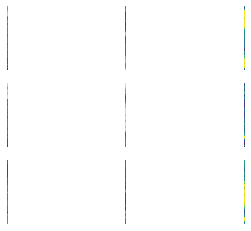

In [17]:
image_aug=[]
labels_aug = []
for k in range(len(imgs1)):
  i = imgs1[k]
  for j in range(9) :
    augmented_image = data_augmentation(i)
    image_aug.append(augmented_image)
    labels_aug.append(labels[k])
    ax = plt.subplot(3, 3, j + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

In [18]:
(np.array(image_aug)).shape

(540, 256, 256, 3)